In [12]:
import numpy as np 
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [13]:
estados=np.array([0,1])#0-Cara;1-Sello
priori=np.array([0.2,0.8])
T=np.array([[0.8,0.2],[0.2,0.8]])
E=np.array([[0.5,0.9],[0.5,0.1]])
Obs=np.array([1,0,0,0,1,0,1,0])

In [14]:
def GetHiddenStates(States, N):
    CStates = list( combinations_with_replacement(States,N))
    Permu = []
    for it in CStates:
        p = list(permutations(it,N))
        for i in p:
            if i not in Permu:
                Permu.append(i)
    return np.array(Permu)

In [15]:
def GetProb(T,E,Obs,State,Prior):
    n = len(Obs)
    p = 1.
    p *= Prior[State[0] ]
    for i in range(n-1):
        p *= T[ State[i+1], State[i] ]
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
    return p

In [16]:
H_Estados=GetHiddenStates(estados,8)
dim = len(H_Estados)
P = np.zeros(dim)
for i in range(dim):
    P[i]=GetProb(T,E,Obs,H_Estados[i],priori)


In [17]:
PObs = np.sum(P)
print(PObs)
maxP = np.max(P)
ii = np.where( P == np.amax(P))
print(H_Estados[ii],maxP)

0.0019344381513984013
[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


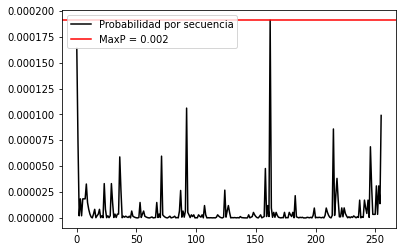

In [19]:
plt.plot(P,color='k',label='Probabilidad por secuencia')
plt.axhline(y=maxP,color='r',label='MaxP = 0.002')
plt.legend()

In [8]:
EstadosObservados=GetHiddenStates(estados,8)
NumeroObs = len(EstadosObservados)
ProbaObs = np.zeros(NumeroObs)
for j in range(NumeroObs):
    ProbaCada = np.zeros(dim)
    for i in range(dim):
        ProbaCada[i] = GetProb(T,E,EstadosObservados[j],H_Estados[i],priori)
    ProbaObs[j] = np.sum(ProbaCada)

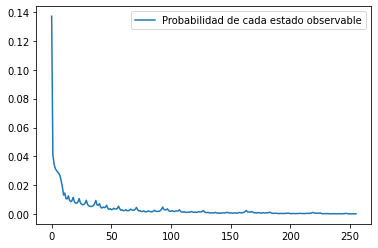

In [9]:
plt.plot(ProbaObs)
np.sum(ProbaObs)
plt.legend(["Probabilidad de cada estado observable"])

In [ ]:
#El resultado si cambia de acuerdo a la probabilidad a-priori, pues esta distribución es la información previa que se tenía,
#lo cual quiere decir que expresa la tendencia hacia los parametros (cara-sello). Por ello, al cambiar estos valores se espera que la tendencia (probabilidades) también cambien para cada caso.